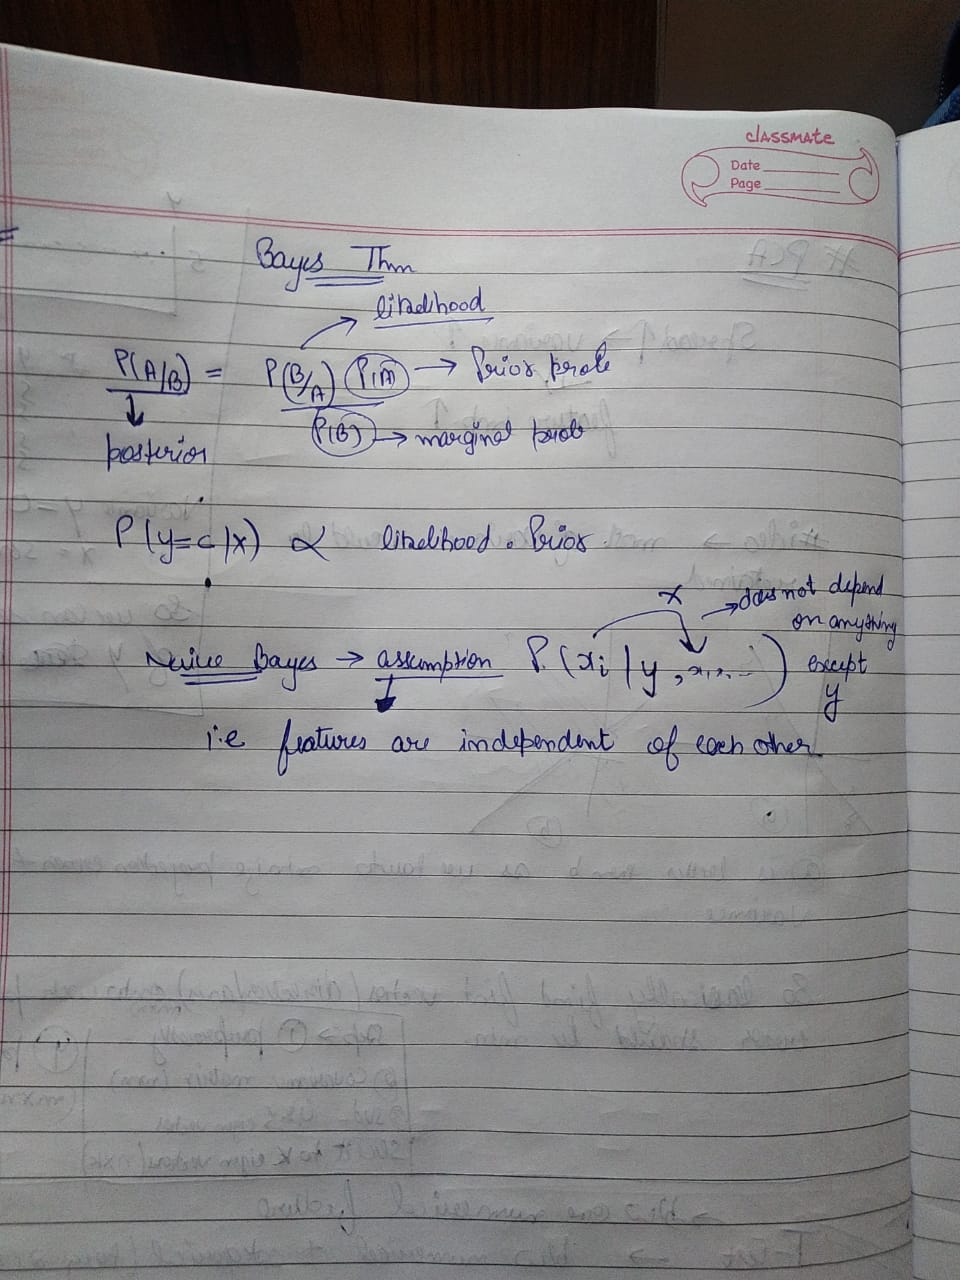

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\naive bayes\mushrooms.csv")

In [3]:
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df['type'].unique()

array(['p', 'e'], dtype=object)

## handeling cetagorical features

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
le= LabelEncoder()
ds=df.apply(le.fit_transform)

In [13]:
ds

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [16]:
for i in df.columns:
    print(df[i].nunique())

2
6
4
10
2
9
2
2
2
12
2
5
4
4
9
9
1
4
3
5
9
6
7


In [17]:
data=ds.values

In [18]:
data[:5,:]

array([[1, 5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3,
        5],
       [0, 5, 2, 9, 1, 0, 1, 0, 0, 4, 0, 2, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2,
        1],
       [0, 0, 2, 8, 1, 3, 1, 0, 0, 5, 0, 2, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2,
        3],
       [1, 5, 3, 8, 1, 6, 1, 0, 1, 5, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3,
        5],
       [0, 5, 2, 3, 0, 5, 1, 1, 0, 4, 1, 3, 2, 2, 7, 7, 0, 2, 1, 0, 3, 0,
        1]])

In [23]:
data_y=data[:,0]
data_x=data[:,1:]

## break data into test and train

In [24]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2)

In [25]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


In [36]:
# le.inverse_transform(ds['cap_shape'])

array(['u', 'u', 'd', ..., 'l', 'm', 'u'], dtype=object)

## building our classifier

In [41]:
def prior_prob(y_train,label):
    
    total_ex=y_train.shape[0]
    class_ex=np.sum(y_train==label)
    
    return class_ex/float(total_ex)

In [40]:
def cond_prob(x_train,y_train,feature_col,feature_val,label):
    
    x_filter=x_train[y_train==label]
    numerator=np.sum(x_filter[:,feature_col]==feature_val)
    denom=np.sum(y_train==label)
    
    return numerator/float(denom)

In [44]:
def predict(x_train,y_train,x_test):
    """x_test is a single testing point,n features"""
    
    classes=np.unique(y_train)
    n_features=x_train.shape[1]
    post_probs=[]
    for label in classes:
        
        likelihood=1.0
        for f in range(n_features):
            cond=cond_prob(x_train,y_train,f,x_test[f],label)
            likelihood*=cond
        prior=prior_prob(y_train,label)
        
        post=prior*likelihood
        post_probs.append(post)
    prediction=np.argmax(post_probs)
    return prediction

In [45]:
output=predict(x_train,y_train,x_test[1])

In [46]:
output

1

In [47]:
y_test[1]

1

In [48]:
def score(x_train,y_train,x_test,y_test):

    pred = []
    for i in range(x_test.shape[0]):
        pred_label = predict(x_train,y_train,x_test[i])
        pred.append(pred_label) # <===Correction
    
    pred = np.array(pred)
    
    accuracy = np.sum(pred==y_test)/y_test.shape[0]
    return accuracy

In [49]:
print(score(x_train,y_train,x_test,y_test))

0.9969230769230769
